<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import torch
data=pd.read_csv("/content/drive/MyDrive/customer_churn_dataset.csv")
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,TimeSpentInMall,VisitsPerMonth,DistanceFromHome,HasCreditCard,Churn
0,1.0,Male,NaN,NaN,90.0,17.0,12.0,22.52,No,Yes
1,2.0,Female,19.0,69522.0,98.0,214.0,NaN,21.17,Yes,Yes
2,3.0,Male,23.0,119161.0,30.0,206.0,22.0,NaN,Yes,Yes
3,4.0,Male,45.0,24886.0,NaN,207.0,25.0,18.68,No,No
4,5.0,NaN,46.0,131249.0,60.0,NaN,NaN,5.50,Yes,Yes


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2700 non-null   float64
 1   Gender            2569 non-null   object 
 2   Age               2700 non-null   float64
 3   AnnualIncome      2700 non-null   float64
 4   SpendingScore     2700 non-null   float64
 5   TimeSpentInMall   2700 non-null   float64
 6   VisitsPerMonth    2700 non-null   float64
 7   DistanceFromHome  2700 non-null   float64
 8   HasCreditCard     2560 non-null   object 
 9   Churn             2565 non-null   object 
dtypes: float64(7), object(3)
memory usage: 234.5+ KB


In [90]:
#handling the null values
data.isnull().sum()

,0
CustomerID,300
Gender,431
Age,300
AnnualIncome,300
SpendingScore,300
TimeSpentInMall,300
VisitsPerMonth,300
DistanceFromHome,300
HasCreditCard,440
Churn,435


In [91]:
data=data.drop('CustomerID',axis=1)

In [92]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0]);
data['Age']=data['Age'].fillna(data['Age'].mean())
data['AnnualIncome']=data['AnnualIncome'].fillna(data['AnnualIncome'].mean())
data['SpendingScore']=data['SpendingScore'].fillna(data['SpendingScore'].mean())
data['TimeSpentInMall']=data['TimeSpentInMall'].fillna(data['TimeSpentInMall'].mean())
data['VisitsPerMonth']=data['VisitsPerMonth'].fillna(data['VisitsPerMonth'].mean())
data['DistanceFromHome']=data['DistanceFromHome'].fillna(data['DistanceFromHome'].mean())
data['HasCreditCard']=data['HasCreditCard'].fillna(data['HasCreditCard'].mode()[0])
data['Churn']=data['Churn'].fillna(data['Churn'].mode()[0])

In [93]:
#Encoding the categorical features
data['HasCreditCard']=data['HasCreditCard'].map({'Yes':1,'No':0})
data['Churn']=data['Churn'].map({'Yes':1,'No':0})


In [94]:
data=pd.get_dummies(data,columns=['Gender'])
x=data.drop('Churn',axis=1)
y=data['Churn'].values.reshape(-1,1)
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [95]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [96]:
#Initializing the weights and bias for the relu function
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)
input_dimension=x.shape[1]
output_dimension=1
torch.manual_seed(42)
weights1=torch.randn(input_dimension,output_dimension,requires_grad=True)
bias1=torch.randn(1,requires_grad=True)



In [97]:
#Activation and loss functions
epoches=800
lr=0.01
def relu(z):
  return torch.max(z,torch.tensor(0.0))
def BCE(y_pred,y):
  e=1e-7
  return -(y*torch.log(y_pred+e)+(1-y)*torch.log(1-y_pred+e)).mean()

In [98]:
#single layer neural network using the relu activation function
relu_loss=[]
relu_grad=[]
for i in range(epoches):
  z=x@weights1+bias1
  y_pred=relu(z)
  y_pred=torch.clamp(y_pred,1e-5,1-1e-5)
  loss=BCE(y_pred,y)
  loss.backward()
  k=weights1.grad.norm().item()
  relu_grad.append(k)
  #updating the weights
  with torch.no_grad():
    weights1-=lr*weights1.grad
    bias1-=lr*bias1.grad
  weights1.grad.zero_()
  bias1.grad.zero_()
  relu_loss.append(loss.item())
relu_loss[-1]

3.1635053157806396

In [99]:
#Initializing the weights and bias for the sigmoid activation function
torch.manual_seed(42)
weights2=torch.randn(input_dimension,output_dimension,requires_grad=True)
bias2=torch.randn(1,requires_grad=True)
def sigmoid(z):
  return 1/(1+torch.exp(-z))


In [100]:
#single layer neural network using the sigmoid activation function
sigmoid_loss=[]
sigmoid_grad=[]
for i in range(epoches):
  z=x@weights2+bias2
  y_pred=sigmoid(z)

  loss=BCE(y_pred,y)
  loss.backward()
  k=weights2.grad.norm().item()
  sigmoid_grad.append(k)
  #updating the weights
  with torch.no_grad():
    weights2-=lr*weights2.grad
    bias2-=lr*bias2.grad
  weights2.grad.zero_()
  bias2.grad.zero_()
  sigmoid_loss.append(loss.item())
sigmoid_loss[-1]


0.7163230776786804

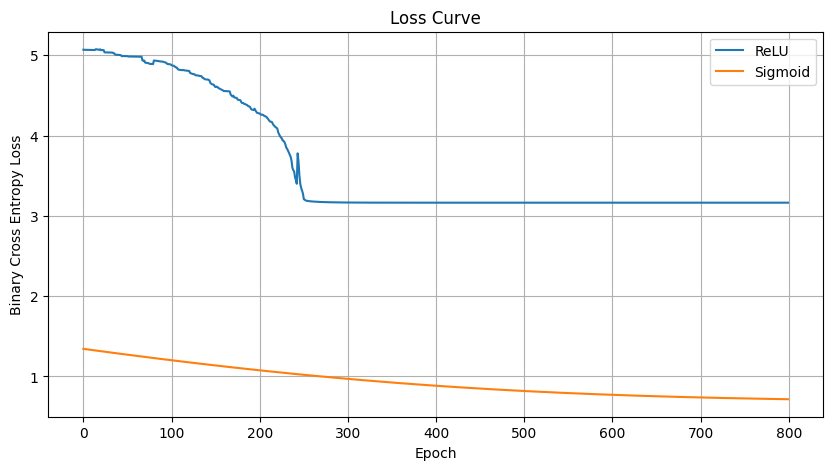

In [101]:
#comparing the relu and sigmoid
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(relu_loss, label='ReLU')
plt.plot(sigmoid_loss, label='Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

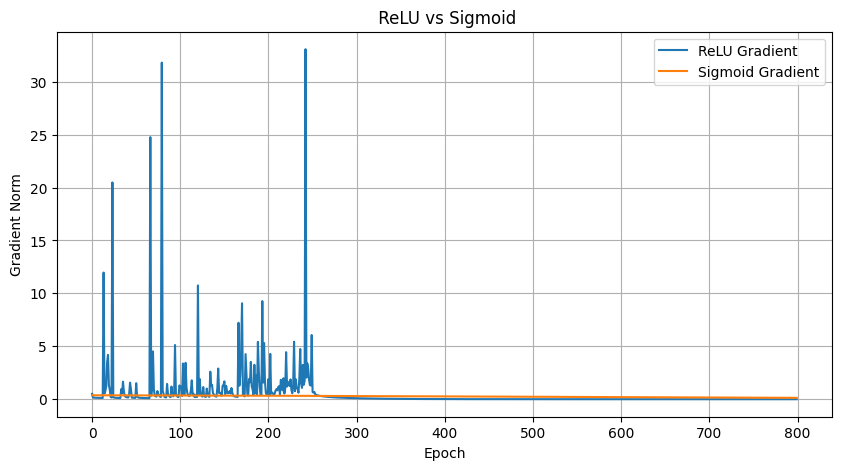

In [102]:
#comparison of the gradients of relu vs sigmoid
plt.figure(figsize=(10, 5))
plt.plot(relu_grad, label='ReLU Gradient')
plt.plot(sigmoid_grad, label='Sigmoid Gradient')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.title(' ReLU vs Sigmoid')
plt.legend()
plt.grid()
plt.show()
